# Example notebok for dummy diagnostic - Reader wrapper case

### Each diagnostic should have a notebook that demonstrates how to use it. This notebook should 

- be placed in this folder,

- be named after the diagnostic itself or a particular functionality, 

- have extension `.ipynb`.

### Recommendations for notebook structure:
- Reduce the number of packages you're importing. Try to keep all imports in your module (`dummy_class.py` and `dummy_func.py`).

- Do not produce too long notebooks. If it is needed, split the notebook into a few based on diagnostic applications.

- Split the notebook into sections and create the Table of Content.

- Provide well-described comments to help users understand the functionality of your diagnostic.

## Content

1. [The load of packages, modules, and data](#the-load-of-packages-modules-and-data)

2. [Illustration of the diagnostic capabilities. Part # 1](#illustration-of-the-diagnostic-capabilities-part--1)

3. [Illustration of the diagnostic capabilities. Part # 2](#illustration-of-the-diagnostic-capabilities-part--2)

## 1. The load of packages, modules, and data

In [1]:
import sys
# temporary hack if your env-dummy.yml
# does not install your diagnostic.
sys.path.insert(0, '../')
from dummy_class_readerwrapper import DummyDiagnosticWrapper

FDB5 binary library not present on system, disabling FDB support.


This class has a Reader wrap inside the initialization. 
Once we initialize the class, we can use the Reader methods to read the data.
Other attributes of the class are given in the initialization as arguments or are stored in a yaml file in the `config` folder.

In [2]:
model = 'ERA5'
exp = 'era5'
source = 'monthly'
var = 'msl'

dummy = DummyDiagnosticWrapper(model=model, exp=exp, source=source, var=var, loglevel='INFO', diagconfigdir='../config', regrid='r100')

2023-06-26 11:34:38 :: Dummy :: INFO     -> Regridding resolution: r100
2023-06-26 11:34:38 :: Dummy :: INFO     -> Config directory: ../config
2023-06-26 11:34:38 :: Dummy :: INFO     -> Loading diagnostic variables from config file


## 2. Illustration of the diagnostic capabilities. Part # 1

dummy initialization created a Reader object inside the class.
A retrieve method is used to read the data from the Reader object.

In [3]:
dummy.retrieve()

2023-06-23 16:16:18 :: Reader :: INFO     -> Retrieving variables: ['msl']
2023-06-23 16:16:20 :: Reader :: INFO     -> msl: Pa --> Pa
2023-06-23 16:16:20 :: Dummy :: INFO     -> Data retrieved


`dummy.data` is the `Dataset` object that contains the data with desired regrid or time aggregation.

In [4]:
dummy.data

<xarray.Dataset>
Dimensions:  (time: 996, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    msl      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu May 25 12:09:12 2023: cdo -O -s -f nc4 -z zip -shifttim...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

Here a nice description of your first method should be given.
In this example, we simply multiply the data by 2.

In [5]:
dummy.multiplication()

2023-06-23 16:16:30 :: Dummy :: INFO     -> Multiplication computed


In [6]:
dummy.multiplication

<xarray.Dataset>
Dimensions:  (time: 996, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    msl      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu May 25 12:09:12 2023: cdo -O -s -f nc4 -z zip -shifttim...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

## Illustration of the diagnostic capabilities. Part # 2

Another method is introduced and a plot is created.

In [7]:
dummy.fldmean()

2023-06-23 16:16:41 :: Dummy :: INFO     -> Field mean computed
2023-06-23 16:16:41 :: Dummy :: INFO     -> Field mean: <xarray.Dataset>
Dimensions:  (time: 996)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Data variables:
    msl      (time) float64 dask.array<chunksize=(12,), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu May 25 12:09:12 2023: cdo -O -s -f nc4 -z zip -shifttim...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...


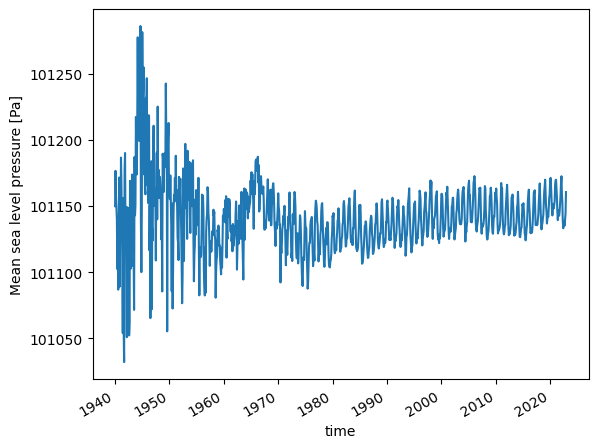

In [8]:
dummy.fldmean[var].plot()